In [169]:
import pandas as pd
import sys

sys.path.insert(0,'/Users/andre/Desktop/Code/Quant_Trading/oil_model/utils/') 

from eda import *

In [170]:
features_df = pd.read_csv("cleaned_dataset.csv")
features_df.set_index(features_df['Date'],inplace=True)
features_df.drop(columns='Date',inplace=True)

In [171]:
features_df.shape

(1771, 14)

In [172]:
features_df.describe()

,crude_price,sp_500,vix,usd,libya_oil_production,kazak_oil_production,qatar_oil_production,iran_oil_production,kuwait_oil_production,uae_oil_production,saudi_oil_production,iraq_oil_production,world_oil_consumption,usa_oil_production
count,1771.000000,1771.000000,1771.000000,1771.000000,1.771000e+03,1.771000e+03,1771.000000,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1771.000000,1.771000e+03
mean,65.893330,1929.774060,19.805602,89.682173,1.172629e+06,1.546955e+06,690075.648438,3.310427e+06,2.578775e+06,2.639227e+06,9.305532e+06,3.042653e+06,49218.489252,7.731976e+06
std,24.932937,996.169074,8.489029,9.712072,5.303633e+05,2.465098e+05,85414.657902,6.442801e+05,2.995052e+05,3.044475e+05,8.338996e+05,1.077104e+06,2834.288521,2.628584e+06
min,15.760000,686.000000,9.140000,72.334999,3.000000e+05,9.721012e+05,551000.000000,2.024333e+06,1.745866e+06,1.930000e+06,7.090000e+06,1.160841e+06,43650.734000,3.974000e+06
25%,46.750000,1186.000000,13.835000,81.373800,8.100000e+05,1.380822e+06,607394.252100,2.764500e+06,2.414956e+06,2.380000e+06,8.900000e+06,2.035000e+06,47468.766000,5.423000e+06
50%,62.930000,1470.000000,17.400000,89.539999,1.206667e+06,1.627397e+06,697774.541100,3.621000e+06,2.677655e+06,2.632083e+06,9.310000e+06,2.950000e+06,48745.684000,6.370000e+06
75%,87.085001,2498.812500,23.219999,96.365501,1.688000e+06,1.729336e+06,752100.000000,3.814750e+06,2.736603e+06,2.875000e+06,9.810000e+06,3.997910e+06,51530.492000,9.668000e+06
max,145.289993,4786.000000,68.510002,120.168001,1.844703e+06,1.857534e+06,836860.000000,4.094000e+06,2.977384e+06,3.065250e+06,1.058850e+07,4.633250e+06,54564.000000,1.300000e+07


In [173]:
features_df.dtypes

crude_price              float64
sp_500                   float64
vix                      float64
usd                      float64
libya_oil_production     float64
kazak_oil_production     float64
qatar_oil_production     float64
iran_oil_production      float64
kuwait_oil_production    float64
uae_oil_production       float64
saudi_oil_production     float64
iraq_oil_production      float64
world_oil_consumption    float64
usa_oil_production       float64
dtype: object

In [174]:
features_df.columns

Index(['crude_price', 'sp_500', 'vix', 'usd', 'libya_oil_production',
       'kazak_oil_production', 'qatar_oil_production', 'iran_oil_production',
       'kuwait_oil_production', 'uae_oil_production', 'saudi_oil_production',
       'iraq_oil_production', 'world_oil_consumption', 'usa_oil_production'],
      dtype='object')

In [175]:
features_df.isna().sum()

crude_price              0
sp_500                   0
vix                      0
usd                      0
libya_oil_production     0
kazak_oil_production     0
qatar_oil_production     0
iran_oil_production      0
kuwait_oil_production    0
uae_oil_production       0
saudi_oil_production     0
iraq_oil_production      0
world_oil_consumption    0
usa_oil_production       0
dtype: int64

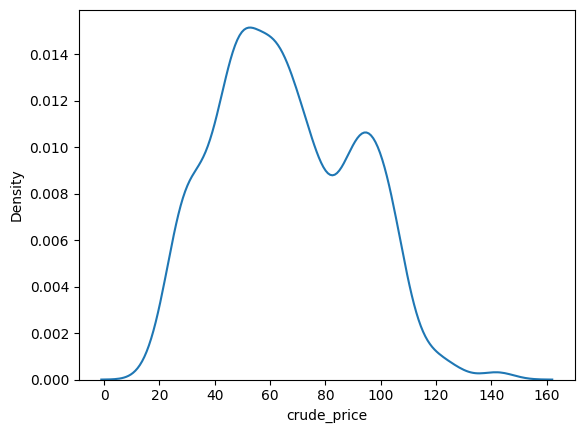

In [176]:
kde(features_df,features_df['crude_price'])

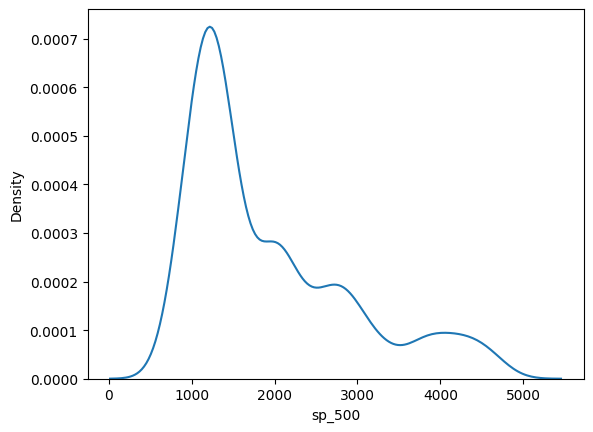

In [177]:
kde(features_df,features_df['sp_500'])

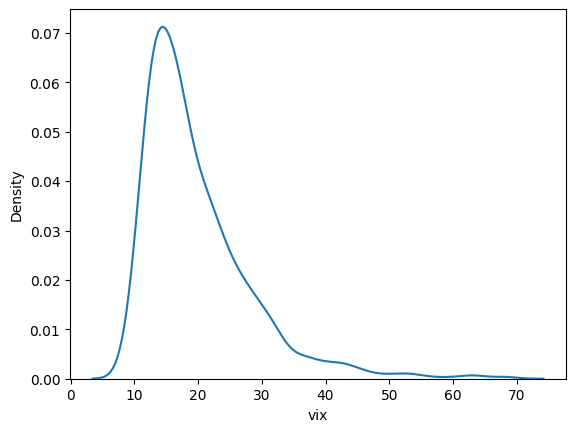

In [178]:
kde(features_df,features_df['vix'])

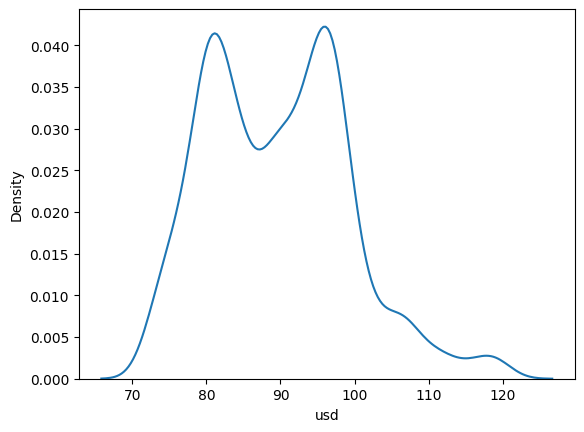

In [179]:
kde(features_df,features_df['usd'])

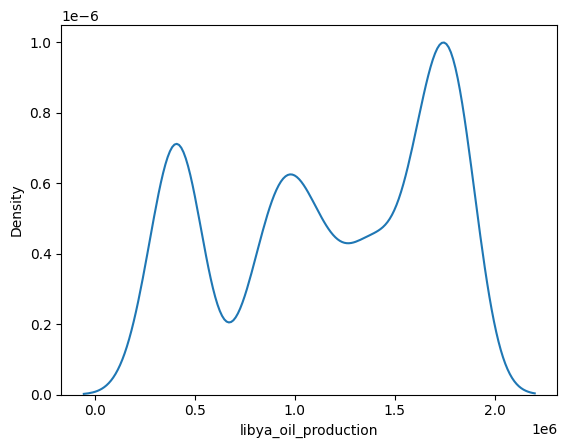

In [180]:
kde(features_df,features_df['libya_oil_production'])

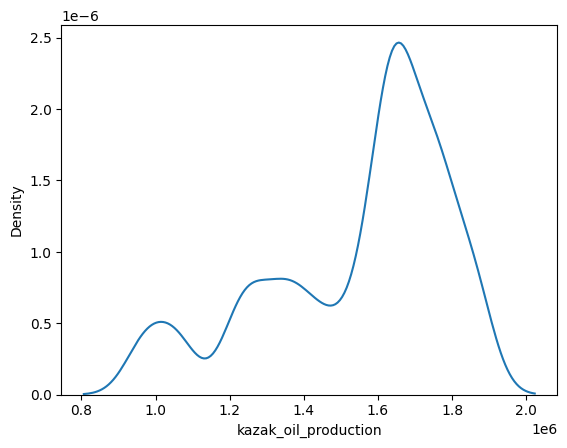

In [181]:
kde(features_df,features_df['kazak_oil_production'])

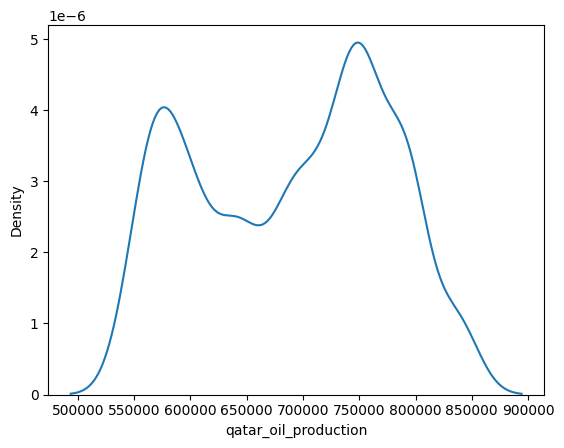

In [182]:
kde(features_df,features_df['qatar_oil_production'])

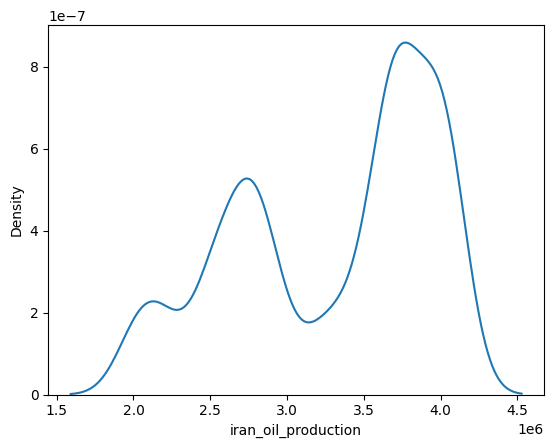

In [183]:
kde(features_df,features_df['iran_oil_production'])

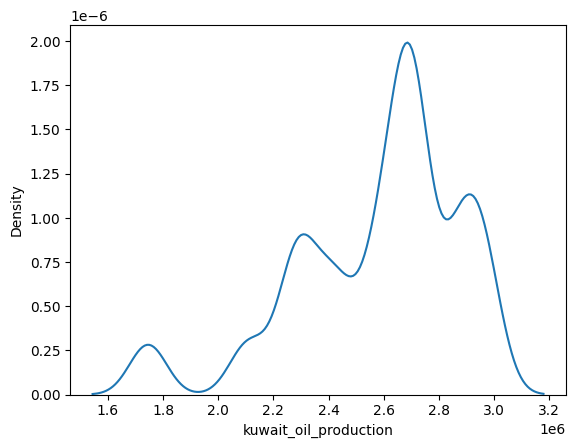

In [184]:
kde(features_df,features_df['kuwait_oil_production'])

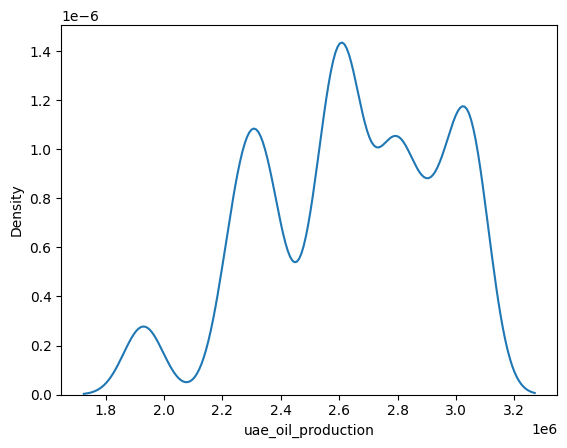

In [185]:
kde(features_df,features_df['uae_oil_production'])

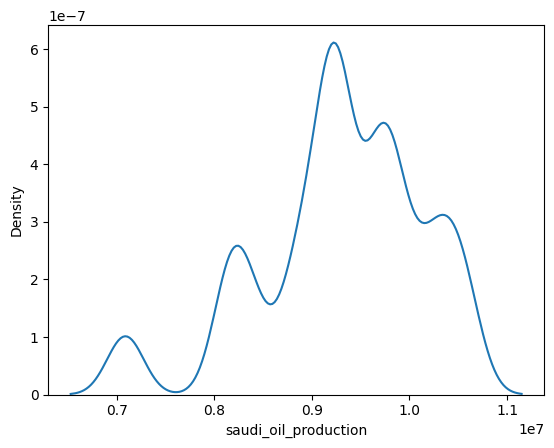

In [186]:
kde(features_df,features_df['saudi_oil_production'])

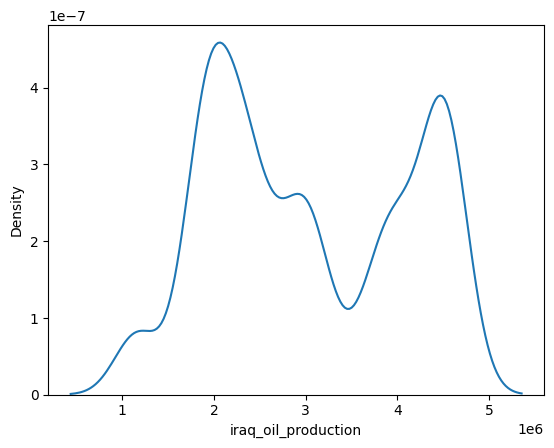

In [187]:
kde(features_df,features_df['iraq_oil_production'])

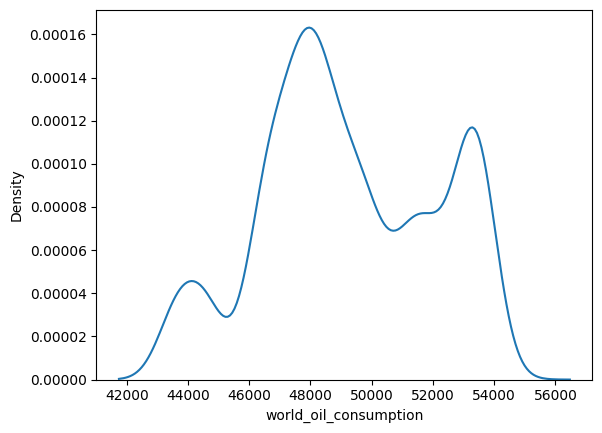

In [188]:
kde(features_df,features_df['world_oil_consumption'])

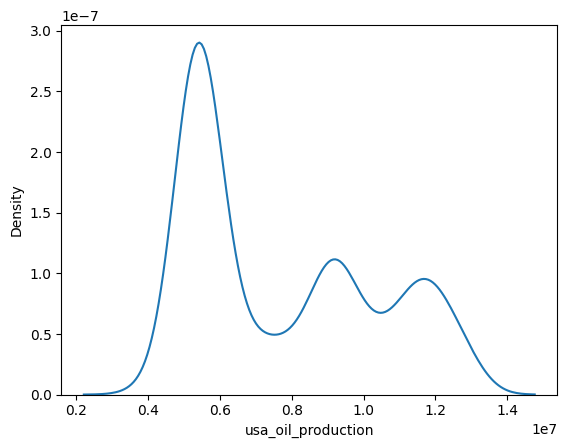

In [189]:
kde(features_df,features_df['usa_oil_production'])

In [190]:
features_df

,crude_price,sp_500,vix,usd,libya_oil_production,kazak_oil_production,qatar_oil_production,iran_oil_production,kuwait_oil_production,uae_oil_production,saudi_oil_production,iraq_oil_production,world_oil_consumption,usa_oil_production
Date,,,,,,,,,,,,,,
2002-01-01,20.605000,1155.2500,22.270000,117.885000,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,43650.734,5873000.0
2002-01-02,21.010000,1154.0000,22.709999,116.269997,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,43650.734,5873000.0
2002-01-03,20.370001,1166.7500,21.340000,116.540001,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,43650.734,5873000.0
2002-01-04,21.620001,1175.2500,20.450001,116.750000,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,43650.734,5873000.0
2002-01-05,20.710001,1161.3125,22.075000,116.692499,1.383184e+06,9.721012e+05,694246.5753,3.248200e+06,1.745866e+06,1930000.0,7.090000e+06,1.823000e+06,43650.734,5873000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,76.930000,3846.0000,22.900000,104.311996,1.179167e+06,1.848760e+06,574000.0000,3.117986e+06,2.590667e+06,2951000.0,9.612583e+06,4.118417e+06,53494.272,12611000.0
2023-01-04,72.839996,3874.5000,22.010000,104.021004,1.179167e+06,1.848760e+06,574000.0000,3.117986e+06,2.590667e+06,2951000.0,9.612583e+06,4.118417e+06,53561.130,12611000.0
2023-01-05,73.669998,3829.0000,22.459999,104.828003,1.179167e+06,1.848760e+06,574000.0000,3.117986e+06,2.590667e+06,2951000.0,9.612583e+06,4.118417e+06,53672.560,12611000.0


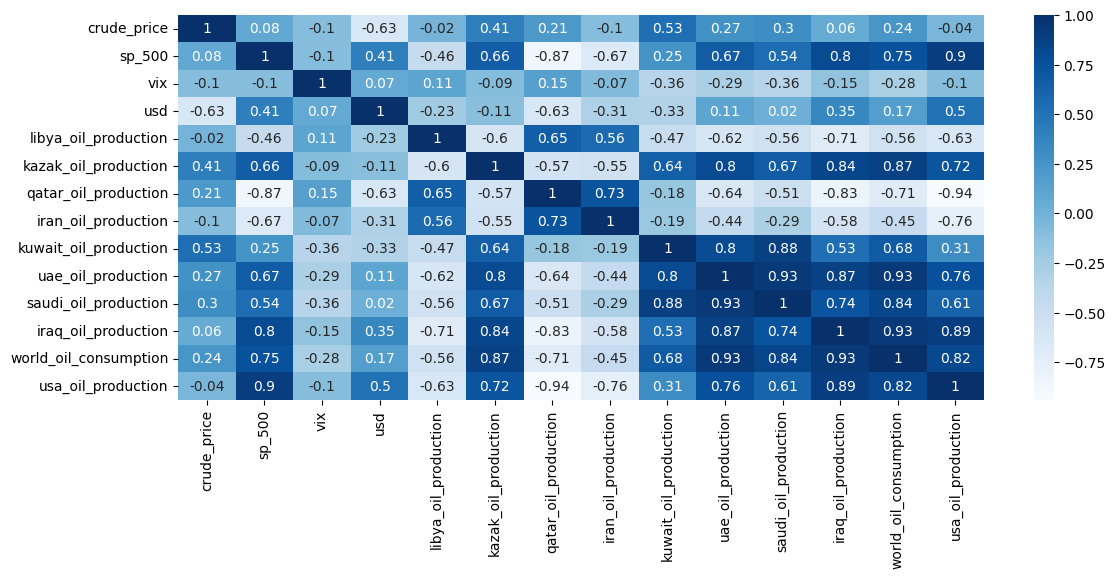

In [191]:
heat_map(features_df)